# Harmonic excitation of an infinite string

**Excited by a harmonic force of frequency $f=1$ Hz at $x=0$. Animation looped from 1 to 4 s.**

In [2]:
############################################################
# Semi-infinite string animation in Python/Matplotlib
# Harmonic excitation at x = 0: u(0,t) = A*sin(omega*t)
############################################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
c        = 2.0        # wave speed
A        = 1.0        # amplitude
omega    = 2*np.pi*1    # angular frequency (1 Hz)
x_max    = 6.0        # spatial window
t_max    = 4.0        # max time
nframes  = 50         # number of frames

# Displacement function u(x,t)
def u(x, t):
    """Vectorized displacement function"""
    result = np.zeros_like(x)
    mask = x <= c*t
    result[mask] = A * np.cos(omega * (t - x[mask]/c))
    return result

############################################################
# Animation
############################################################

# Setup spatial grid
x = np.linspace(0, x_max, 500)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot([], [], 'b-', linewidth=2, label='Displacement')
wavefront_line, = ax.plot([], [], 'r--', linewidth=1.5, label='Wavefront')
time_text = ax.text(0.1, 1.35*A, '', fontsize=10)

# Setup plot limits and grid
ax.set_xlim(0, x_max)
ax.set_ylim(-1.5*A, 1.5*A)
ax.axhline(y=-A, color='gray', linestyle=':', linewidth=0.5)
ax.axhline(y=0, color='gray', linestyle=':', linewidth=0.5)
ax.axhline(y=A, color='gray', linestyle=':', linewidth=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x,t)$')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

def init():
    line.set_data([], [])
    wavefront_line.set_data([], [])
    time_text.set_text('')
    return line, wavefront_line, time_text

def animate(frame):
    t_val = frame * (t_max / nframes)

    # Update displacement
    y = u(x, t_val)
    line.set_data(x, y)

    # Update wavefront
    x_front = c * t_val
    if x_front <= x_max:
        wavefront_line.set_data([x_front, x_front], [-1.5*A, 1.5*A])
    else:
        wavefront_line.set_data([x_max, x_max], [-1.5*A, 1.5*A])

    # Update text
    time_text.set_text(f't = {t_val:.2f}s, x_front = {x_front:.2f}')

    return line, wavefront_line, time_text

# Create animation
anim = FuncAnimation(fig, animate, init_func=init,
                    frames=nframes+1, interval=100, blit=True)

# Display in Colab
plt.close()  # Prevent static plot display
HTML(anim.to_jshtml())

# To save as GIF (optional, requires pillow):
# anim.save('string_wave.gif', writer='pillow', fps=10)



## Displacement of a point on the string.


In [3]:
############################################################
# Side-by-side animation: String + Marker Trajectory
############################################################

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
c        = 2.0
A        = 1.0
omega    = 2*np.pi
x_max    = 6.0
t_max    = 4.0
nframes  = 25

x_marker = 2.0  # Position to track
traj_res = 100

def u_scalar(x_val, t):
    if x_val <= c*t:
        return A * np.sin(omega * (t - x_val/c))
    else:
        return 0.0

def u(x, t):
    result = np.zeros_like(x)
    mask = x <= c*t
    result[mask] = A * np.sin(omega * (t - x[mask]/c))
    return result

x = np.linspace(0, x_max, 200)

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# LEFT: String displacement
line_string, = ax1.plot([], [], 'b-', linewidth=2)
marker_point, = ax1.plot([], [], 'o', color='orange', markersize=12)
wavefront_line, = ax1.plot([], [], 'r--', linewidth=1.5, alpha=0.7)

ax1.set_xlim(0, x_max)
ax1.set_ylim(-1.5*A, 1.5*A)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_title('String Displacement')

# RIGHT: Marker trajectory
traj_line, = ax2.plot([], [], 'orange', linewidth=2)
traj_point, = ax2.plot([], [], 'o', color='red', markersize=10)

ax2.set_xlim(0, t_max)
ax2.set_ylim(-1.5*A, 1.5*A)
ax2.set_xlabel('$t$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_title(f'Marker Trajectory (x = {x_marker})')

plt.tight_layout()

def animate(frame):
    t_val = frame * (t_max / nframes)

    # Update string
    y = u(x, t_val)
    line_string.set_data(x, y)

    # Update marker
    marker_disp = u_scalar(x_marker, t_val)
    marker_point.set_data([x_marker], [marker_disp])

    # Update wavefront
    x_front = c * t_val
    if x_front >= x_marker:
        wavefront_line.set_data([x_front, x_front], [-1.5*A, 1.5*A])
    else:
        wavefront_line.set_data([], [])

    # Update trajectory
    if t_val >= x_marker/c:
        t_traj = np.linspace(x_marker/c, t_val, traj_res)
        y_traj = np.array([u_scalar(x_marker, tt) for tt in t_traj])
        traj_line.set_data(t_traj, y_traj)
        traj_point.set_data([t_val], [marker_disp])
    else:
        traj_line.set_data([], [])
        traj_point.set_data([], [])

    return line_string, marker_point, wavefront_line, traj_line, traj_point

anim = FuncAnimation(fig, animate, frames=nframes+1, interval=200)
plt.close(fig)
HTML(anim.to_jshtml())



* The elements of the string execute simple harmonic motion about their  equilibrium position.
* The frequency of oscillation $f=\omega/2\pi$.
* The period of oscillation $T=1/f$.

## Snapshot of the string at 1.2 s and 2.5 s.

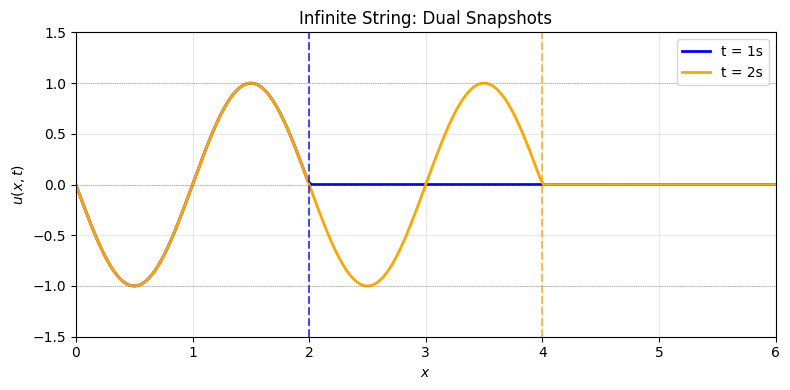

In [6]:

############################################################
# Dual snapshots t=1.2s + t=2.5s
############################################################

t1 = 1
t2 = 2

fig, ax = plt.subplots(figsize=(8, 4))

# Plot displacement curves
ax.plot(x, u(x, t1), 'b-', linewidth=2, label=f't = {t1}s')
ax.plot(x, u(x, t2), 'orange', linewidth=2, label=f't = {t2}s')

# Plot wavefronts
x_front1 = c * t1
x_front2 = c * t2
ax.plot([x_front1, x_front1], [-1.5*A, 1.5*A],
        'b--', linewidth=1.5, alpha=0.7)
ax.plot([x_front2, x_front2], [-1.5*A, 1.5*A],
        'orange', linestyle='--', linewidth=1.5, alpha=0.7)

# Setup plot
ax.set_xlim(0, x_max)
ax.set_ylim(-1.5*A, 1.5*A)
ax.axhline(y=-A, color='gray', linestyle=':', linewidth=0.5)
ax.axhline(y=0, color='gray', linestyle=':', linewidth=0.5)
ax.axhline(y=A, color='gray', linestyle=':', linewidth=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$u(x,t)$')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_title('Infinite String: Dual Snapshots')

plt.tight_layout()
plt.show()


* The shape of the string at any instant is sinusoidal.
* At fixed time, the shape is a sinusoidal function of $x$.
* The waveform moves one wavelength in time equal to one period ($\lambda:T$)
* The speed of wavefront $c=\lambda/T=\lambda f$
* $\lambda=\frac{c}{f}=\frac{c 2\pi}{\omega}=\frac{2\pi}{k}
* Wavenumber $k=\frac{2\pi}{\lambda}$